In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import Model, layers,Sequential,regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow_addons.optimizers import AdamW, SGDW

In [2]:
detetor_folder = 'detector_tau_5_r2_99'

detector=tf.keras.models.load_model(detetor_folder)
detector.summary()

2022-01-08 17:07:15.130801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 17:07:15.135317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 17:07:15.135601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-08 17:07:15.136184: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 sequential (Sequential)        (None, 187, 1)       6817        ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 187, 1)      4           ['sequential[0][0]']             
 alization)                                                                                       
                                                                                                  
 softmax (Softmax)              (None, 187, 1)       0           ['batch_normalization[0][0]']

In [3]:
mit_train_path="./dataset/mitbih_train.csv"
mit_test_path="./dataset/mitbih_test.csv"

def create_pd(train_path,test_path):
    train=pd.read_csv(train_path)
    test=pd.read_csv(test_path)
    train.columns=[x for x in range(188)]
    test.columns=[x for x in range(188)]
    return pd.concat([train,test], axis=0, join='inner').sort_index()

mit= create_pd(mit_train_path,mit_test_path)

X = np.asarray(mit.iloc[:,:187].values)
y = mit.iloc[:,187].values
y = to_categorical(y)

X = X.reshape(-1, 187, 1)
input_shape = X.shape[1:]
n_label = y.shape[1]

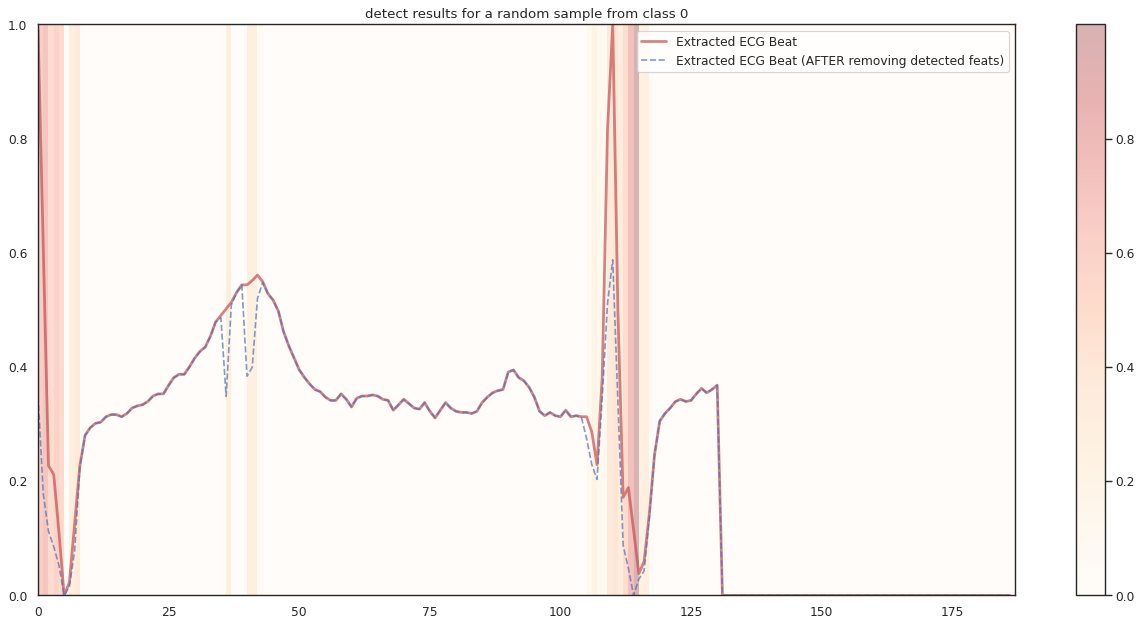

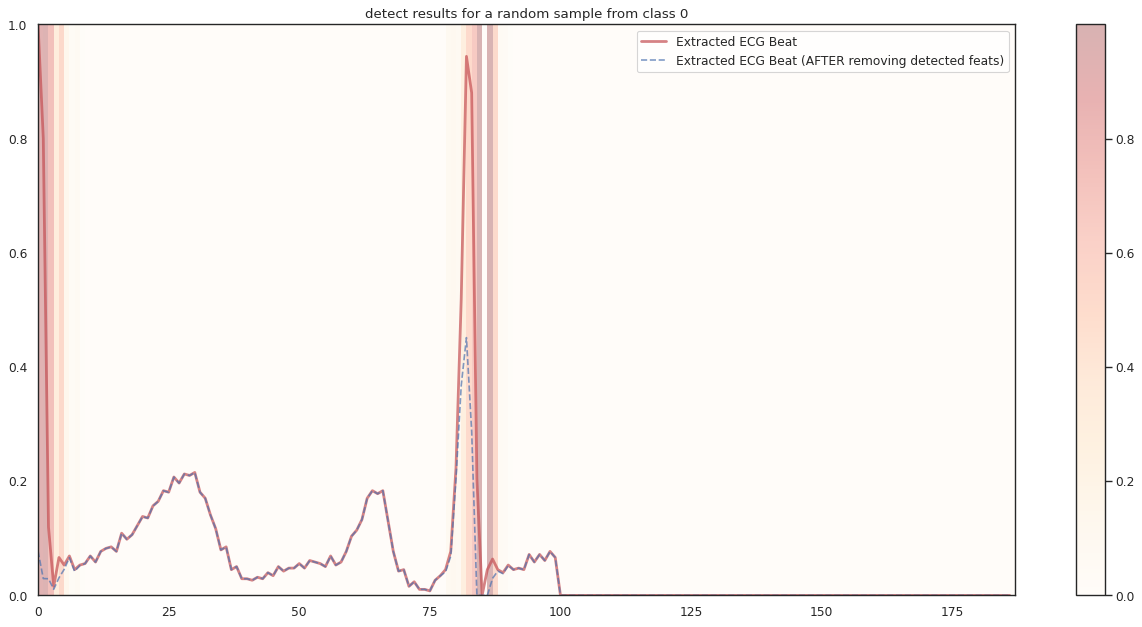

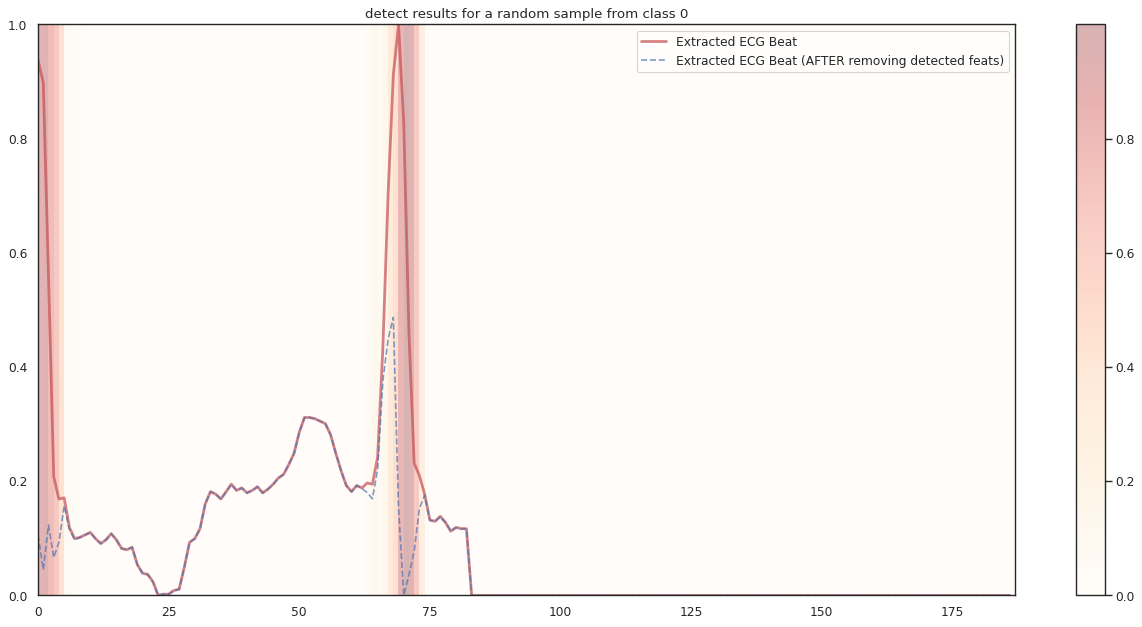

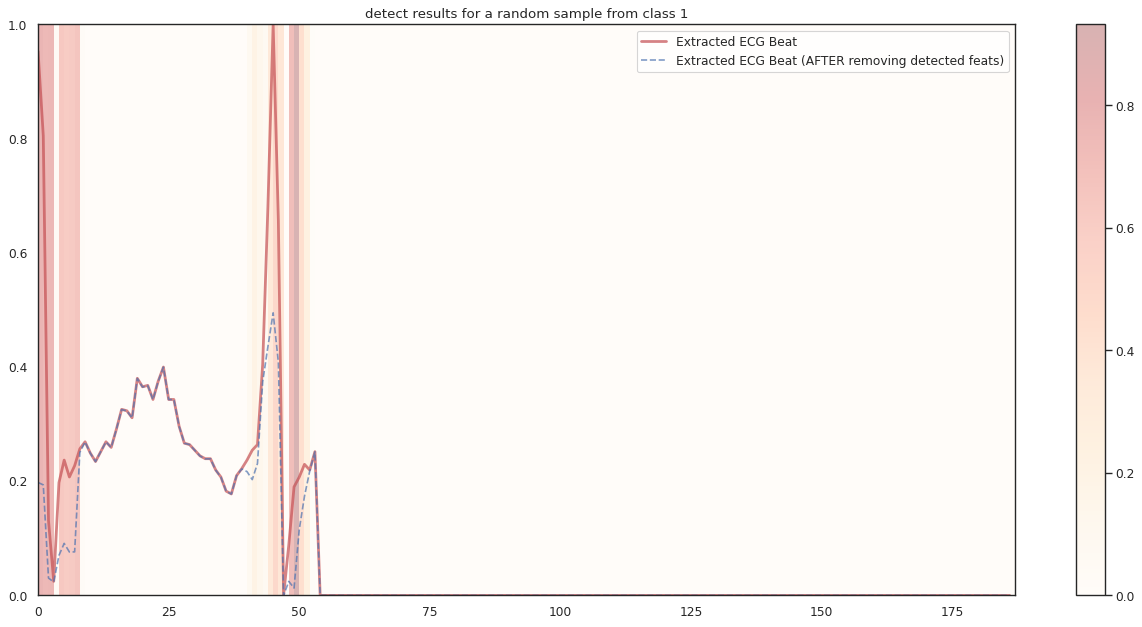

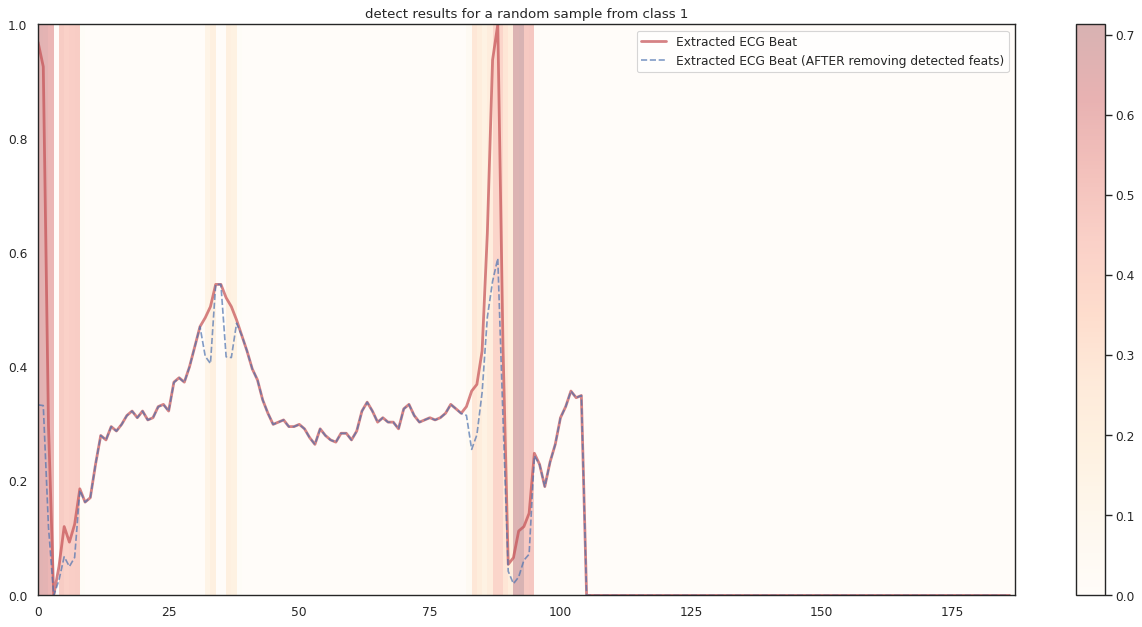

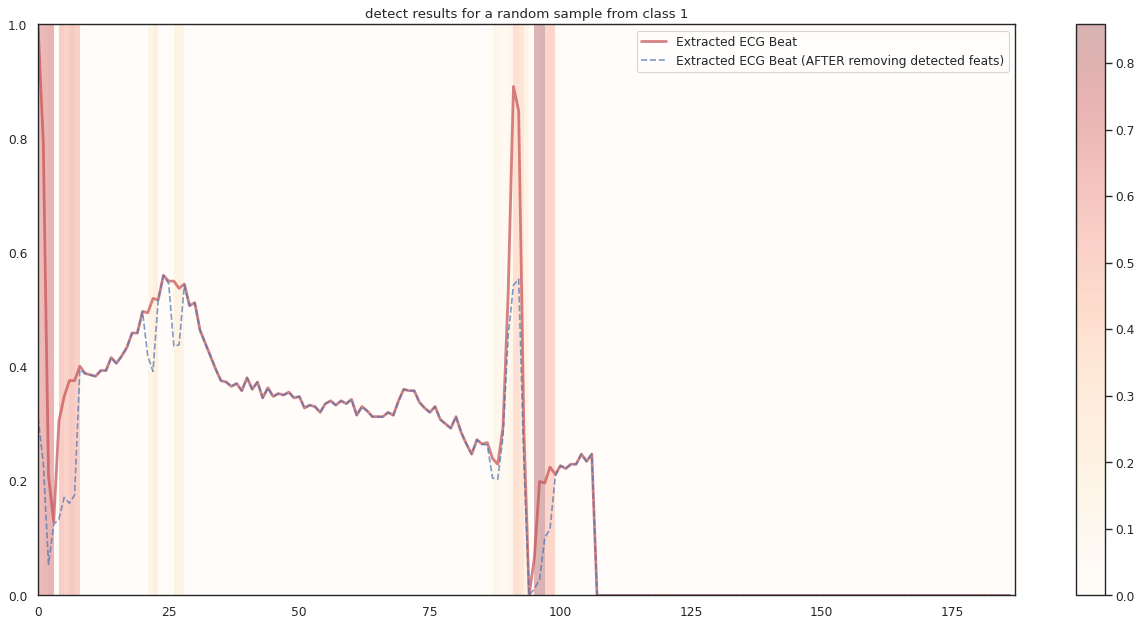

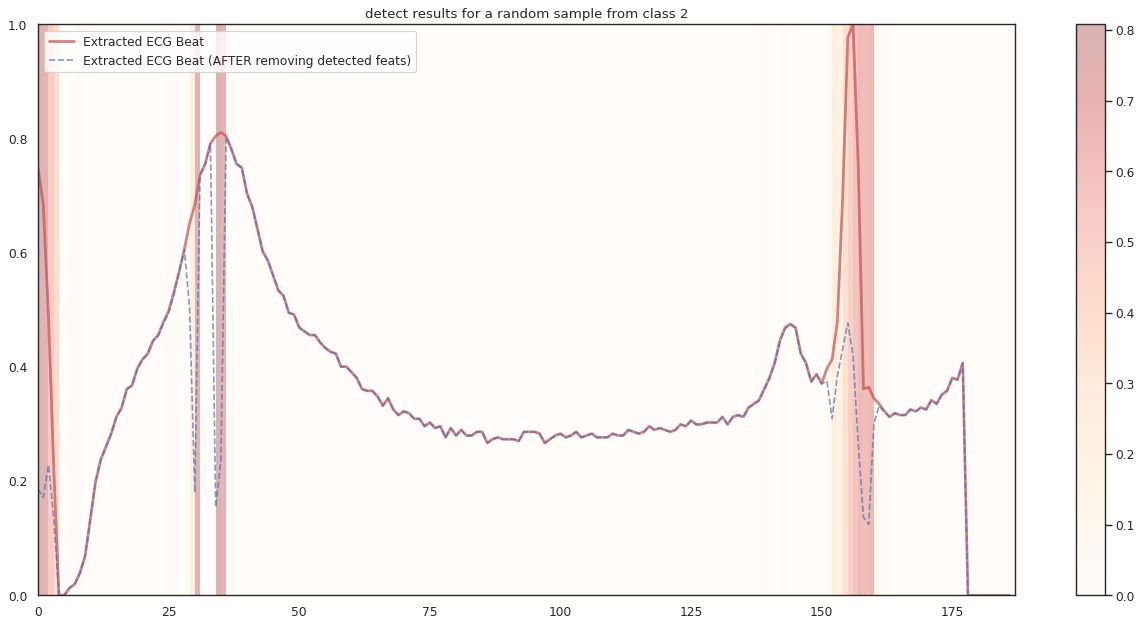

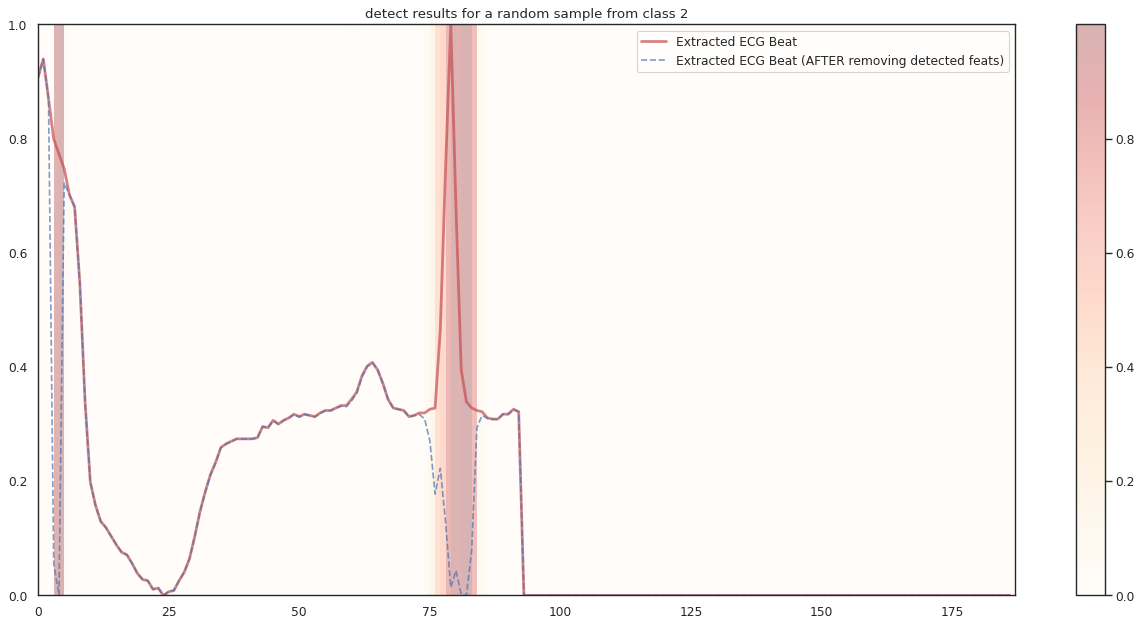

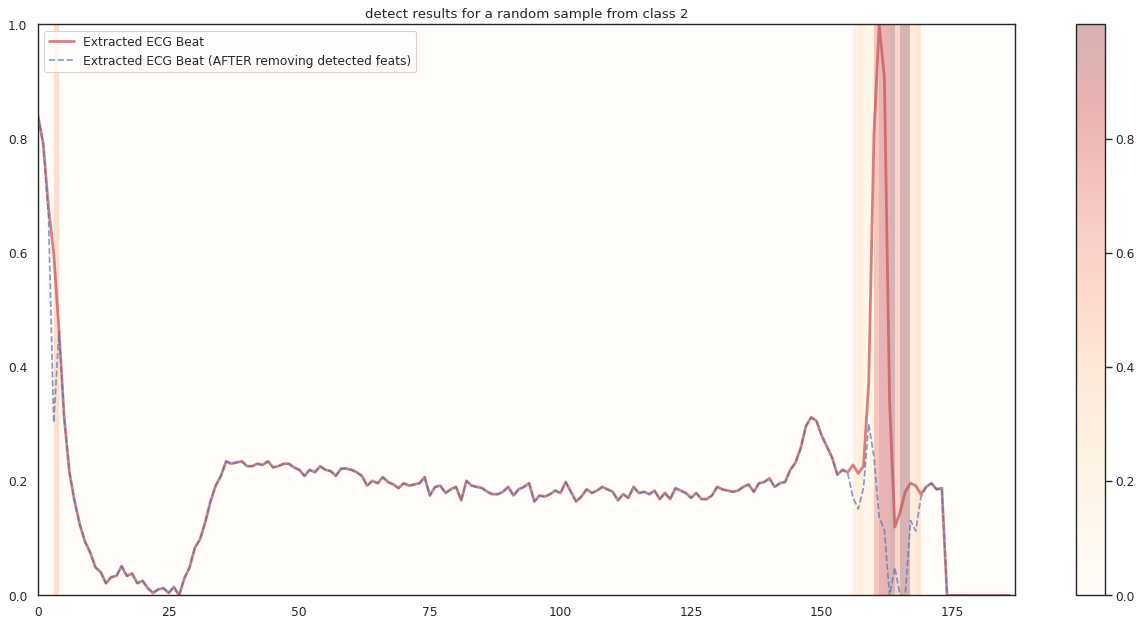

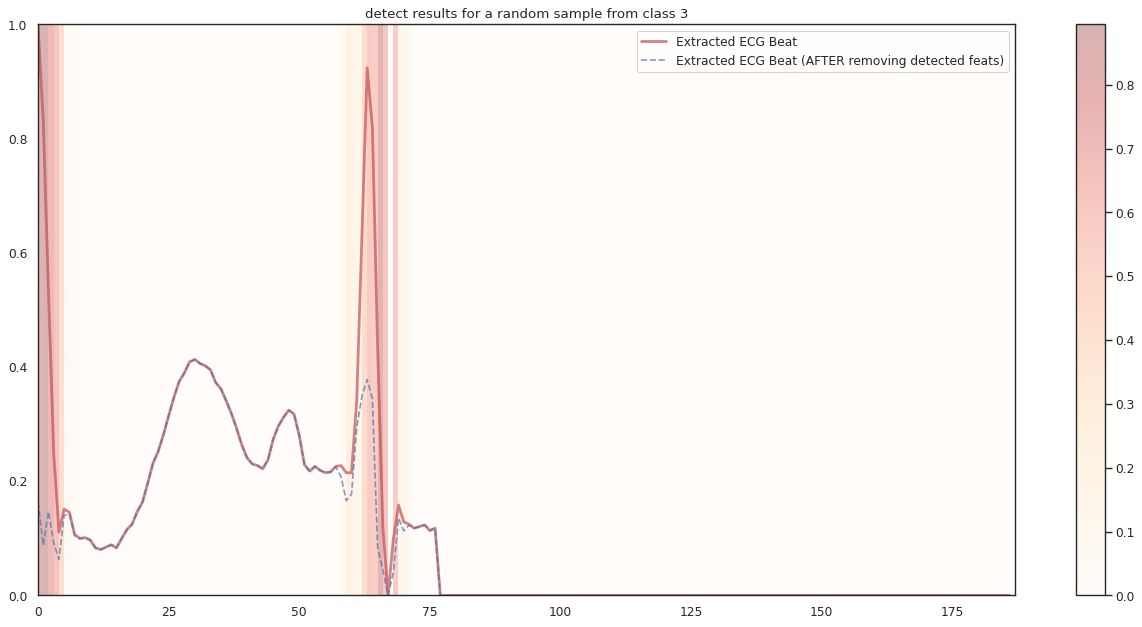

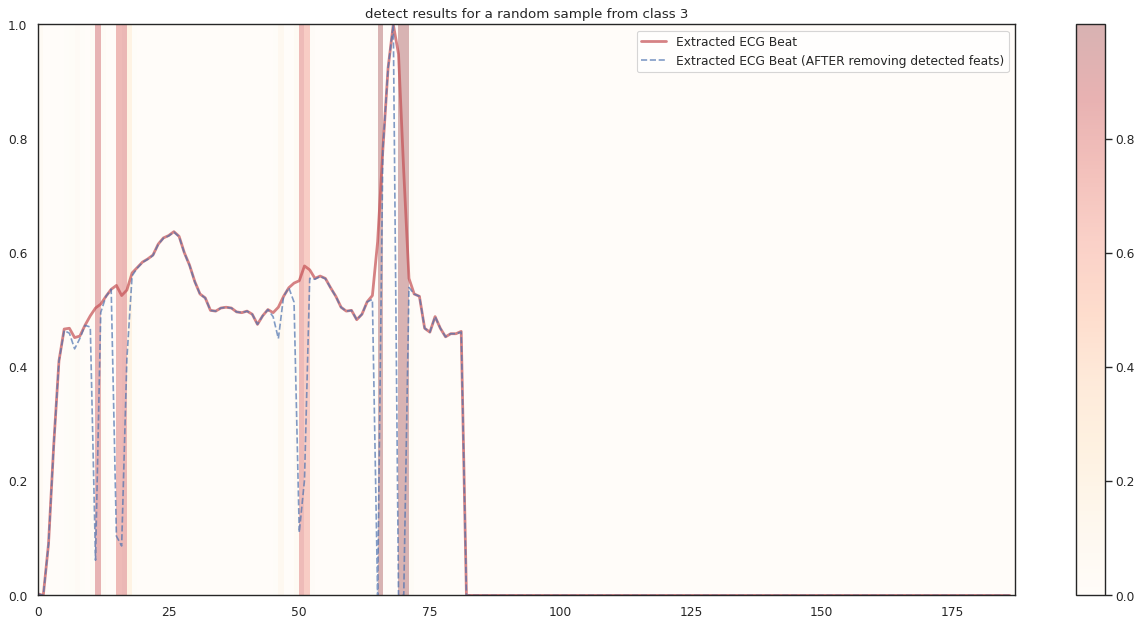

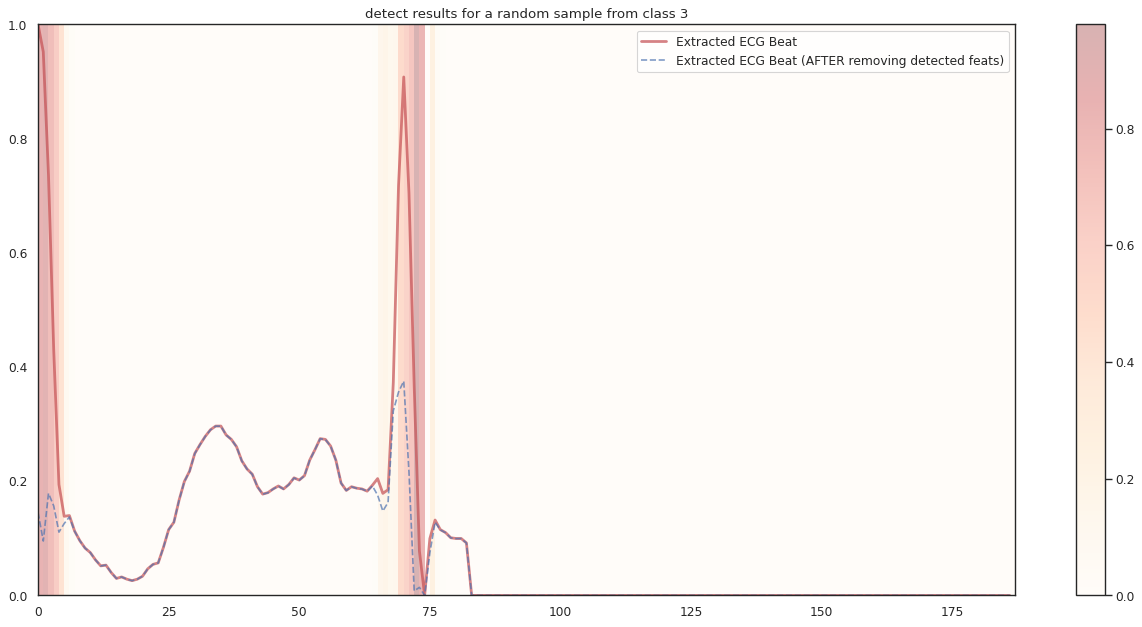

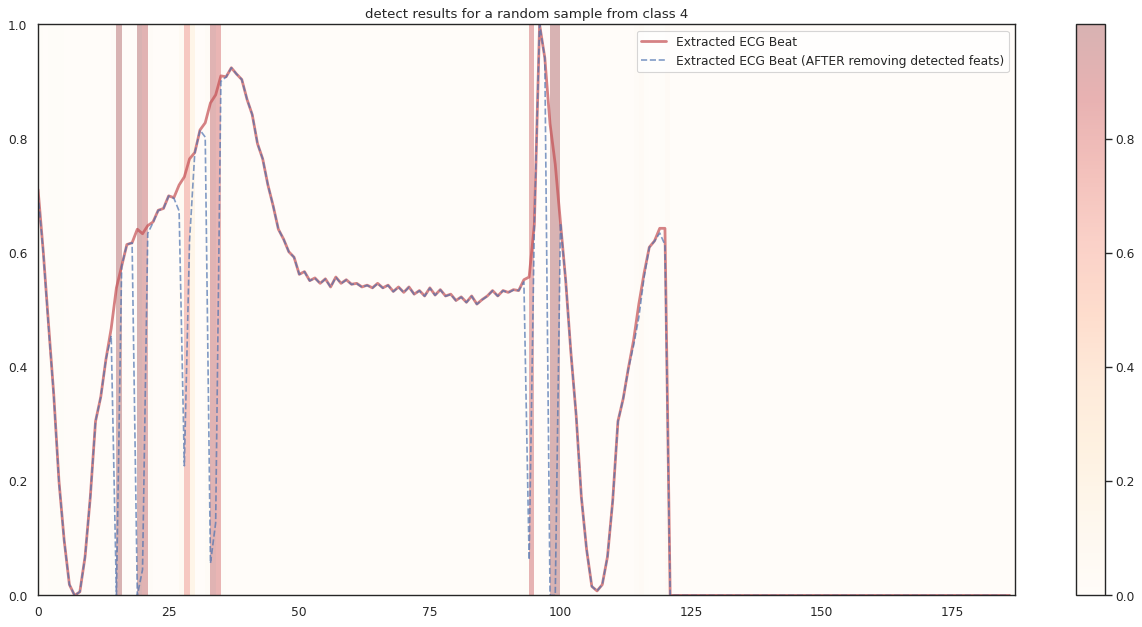

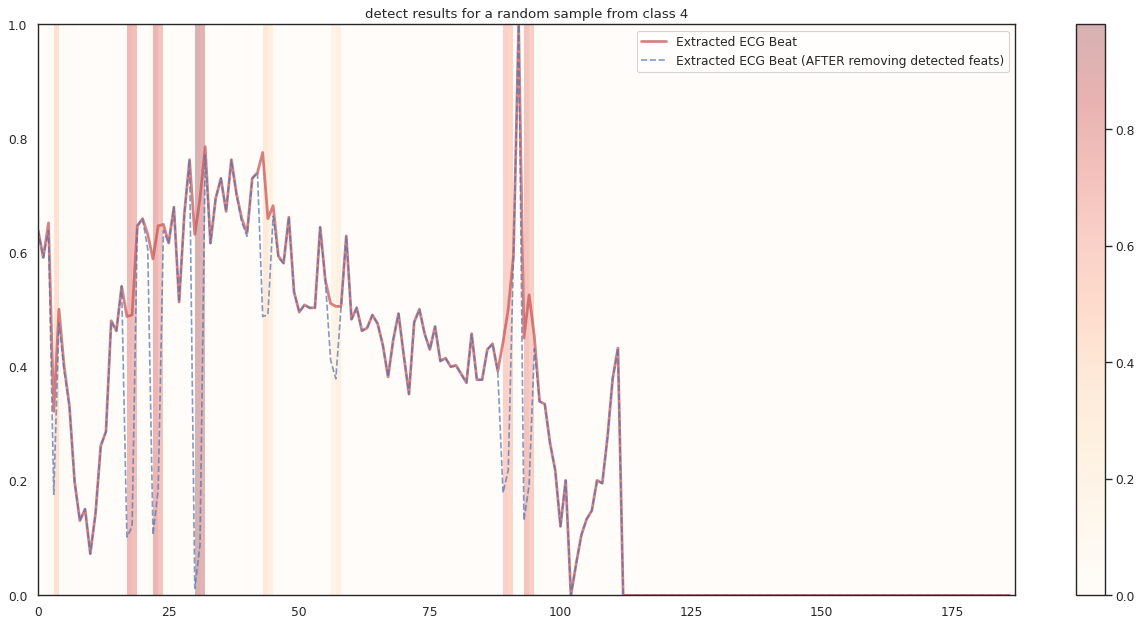

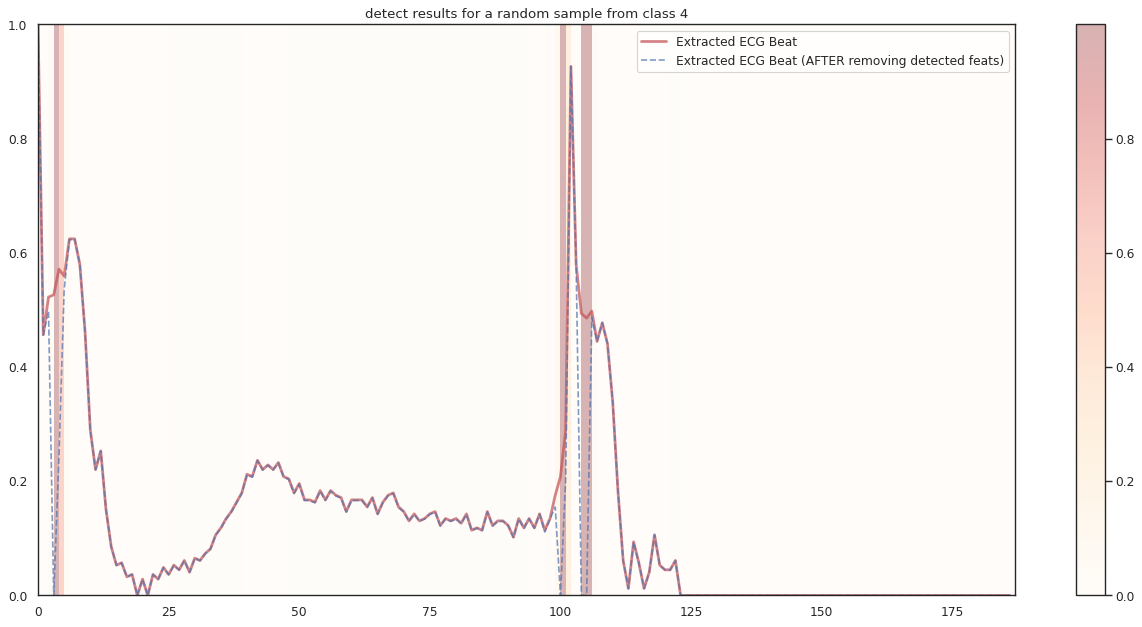

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

n_demo = 3

for k in range(n_label):
    demo_ind = np.array([np.random.choice(np.where(y[:,k] == 1)[0]) for i in range(n_demo)])
    X_demo = X[demo_ind]
    X_demo_detect = detector.predict(X_demo)
    X_demo_hl =  - (X_demo_detect - X_demo) / (X_demo + 1e-5)

    sns.set_theme()
    timepoint = list(range(input_shape[0]))

    sns.set_theme(style= 'white', palette=None)
    for i in range(len(X_demo)):
        X_tmp, X_detect_tmp, X_hl_tmp = X_demo[i], X_demo_detect[i], X_demo_hl[i]
        plt.figure(figsize=(16, 8), dpi=80)
        plt.title('detect results for a random sample from class %s' %k)
        plt.imshow(X_hl_tmp[np.newaxis,:], cmap="OrRd", aspect='auto', alpha=0.3, 
                                            extent = (0, 187, 0, 1))
        plt.colorbar()
        plt.plot(timepoint, X_tmp, linewidth=2.5, alpha=.7, color='r', 
            label='Extracted ECG Beat')
        plt.plot(timepoint, X_detect_tmp, linewidth=1.5, alpha=.7, color='b', linestyle='--', 
            label='Extracted ECG Beat (AFTER removing detected feats)')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()